In [ ]:
# ============================================
# 🧊 Titanic 生存予測プロジェクト
# Author: k-ohyeah
# Date: 2025-09-30
# Model: Logistic Regression + Feature Engineering
# ============================================

# 目的：
# Titanicデータセットを用いて、生存者を予測する分類モデルを作成する。
# データ理解 → 前処理 → 特徴量エンジニアリング → モデル構築 → チューニング → 評価 の流れで進める。
#そのうちのデータ理解のための可視化について学習


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#ライブラリ読み込み
# 以下データ分析の”三種の神器”
import pandas as pd #pandas=表形式ライブラリ
import matplotlib.pyplot as plt #matplotlib.pyplot＝グラフ描画ライブラリ
import seaborn as sns #seaborn＝matplotlibをベースにした、きれいなグラフが簡単に描けるライブラリ

#データ読み込み
train = pd.read_csv("/kaggle/input/titanic/train.csv") #pd.read_csv("ファイルパス"): CSVファイルを読み込んで DataFrame（表形式データ）として保持
train.head() #.head() は 最初の5行だけ表示してデータの中身を確認する関数

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#欠損値チェック

# データ件数（行数）
print("データ件数:", len(train)) #データの 行数（観測数）
print() #改行
#len() で出している データ件数 は タイトル行（カラム名の行）を含みません。
#CSV を読み込むときに、最初の行は「ヘッダー（列名）」として処理されるからです。

# 各列ごとの欠損数
print("各列の欠損数:")
print(train.isnull().sum())
#.isnull() → データが「欠損（NaN = 値がない）」かどうかを True/False で返す
#.sum() → True を 1 としてカウントして合計を出す


#----------------------------------------------------------
#同一セルで複数処理の実行結果を表示する方法
#1.print文を使う

#print(train.head())
#print(train.isnull().sum())

#->これなら両方出ます。

#2Notebookでは display() を使う

#from IPython.display import display

#display(train.head())
#display(train.isnull().sum())

#->Jupyter系の環境ではこちらの方がきれいに出ます。

データ件数: 891

各列の欠損数:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<Axes: >

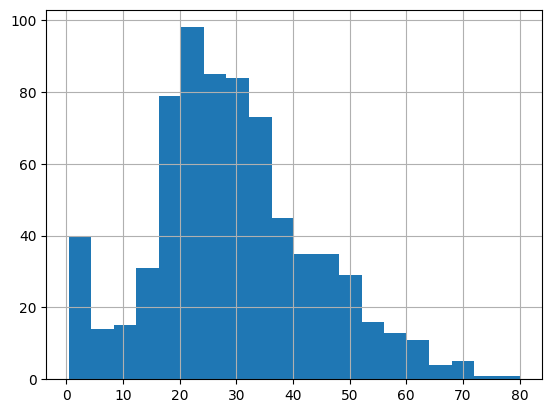

In [4]:
#数値データの分布確認_Age

train['Age'].hist(bins=20)

#train['Age']=「Age 列」を取り出す
#.hist(bins=20) → ヒストグラム（棒グラフ）を20個の区間で描画する
#bins=range(開始, 終了, 刻み幅) のように「具体的な区切り」を指定する方法あり
#「終了の数字は含まれない」ルール

<Axes: >

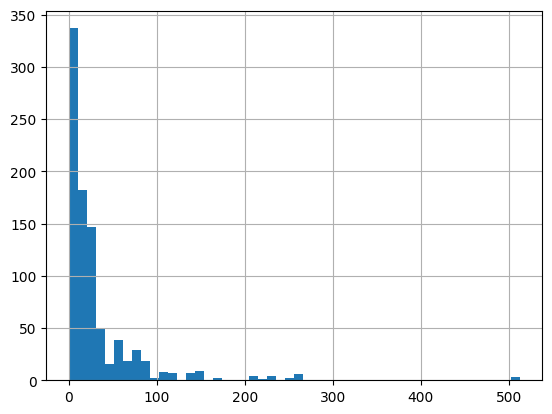

In [5]:
#数値データの分布確認_fare

train['Fare'].hist(bins=50)

<Axes: xlabel='Sex'>

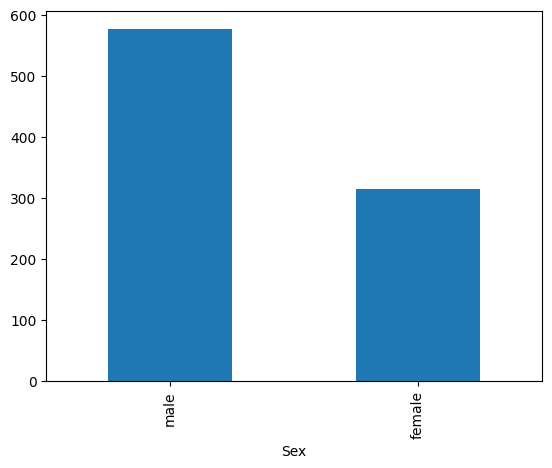

In [6]:
#カテゴリ変数の分布確認_SEX

train['Sex'].value_counts().plot(kind='bar')
#value_counts() → 各値が何回出現しているかを数える
#kind='barh' で横棒グラフにもできます

<Axes: xlabel='Pclass'>

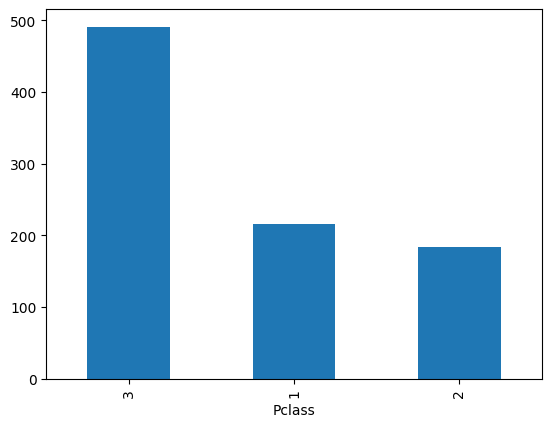

In [7]:
#カテゴリ変数の分布確認_Pclass

train['Pclass'].value_counts().plot(kind='bar')


#カテゴリ型に変換して「順序」を指定すること可能。
#例：Pclass（1,2,3の順番で見たい場合）
#train['Pclass'] = pd.Categorical(train['Pclass'], categories=[1,2,3], ordered=True)
#print(train['Pclass'].value_counts().sort_index())

<Axes: xlabel='Embarked'>

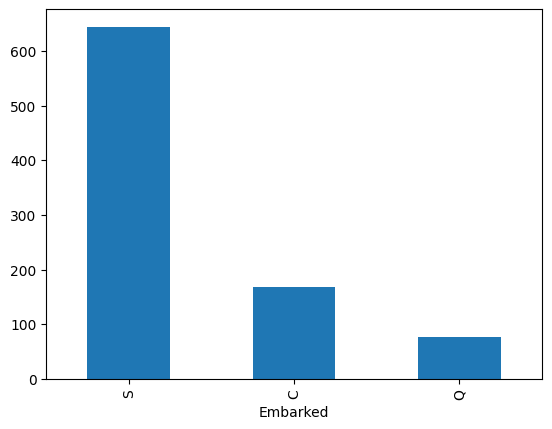

In [8]:
#カテゴリ変数の分布確認_Embarked

train['Embarked'].value_counts().plot(kind='bar')

In [9]:
#生存率との関係（集計）_SEX

train.groupby('Sex')['Survived'].mean()

#.groupby('Sex') → 性別ごとにデータをまとめる
#['Survived'].mean() → そのグループの生存率（平均値）を計算

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [10]:
#生存率との関係（集計）_Pclass

train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [11]:
train['AgeGroup'] = pd.cut(train['Age'], bins=[0,10,20,30,40,50,60,70,80])
train.groupby('AgeGroup', observed=True)['Survived'].mean()

#pd.cut(train['Age'], bins=[…]) → 年齢を10歳刻みでグループ化する（0–10, 10–20, …）
#train['AgeGroup'] という新しい列を作る
#groupby('AgeGroup')['Survived'].mean() → 年齢帯ごとの生存率を出す

AgeGroup
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64

<Axes: xlabel='Pclass', ylabel='Survived'>

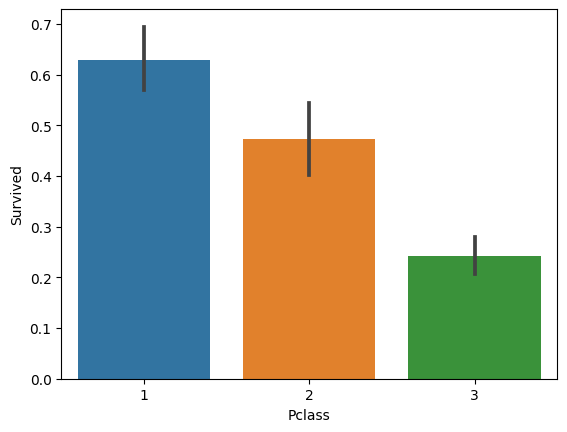

In [12]:
#可視化（棒グラフ）

sns.barplot(x='Pclass', y='Survived', data=train)
#seaborn の barplot を使って「客室クラス別の生存率」を棒グラフにする

#seaborn.barplot の デフォルトの挙動 はカテゴリxごとの y の平均値を棒グラフ にします

#estimator に関数を渡すことで変更可能です。
#sns.barplot(x='AgeGroup', y='Survived', data=train, estimator=np.median)
#np.median → 中央値 / np.sum → 合計値 / len → データ件数

<Axes: xlabel='Sex', ylabel='Survived'>

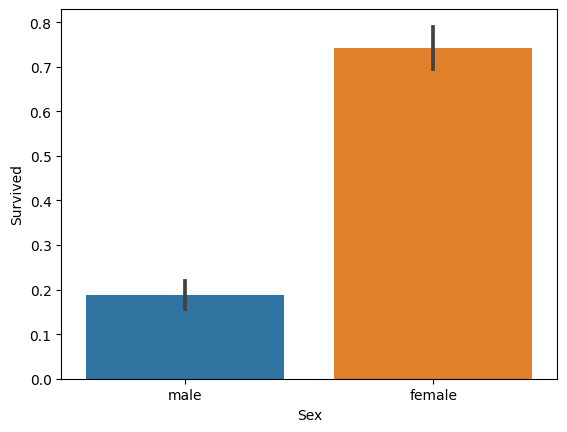

In [13]:
#可視化（棒グラフ）
sns.barplot(x='Sex', y='Survived', data=train)

<Axes: xlabel='SibSp', ylabel='Survived'>

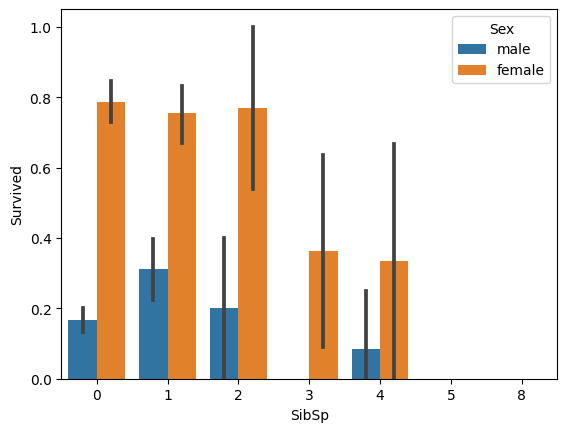

In [14]:
#sibsp/sexの関係性
#sibsp=1のとき、surviveはfemaleが多い
sns.barplot(x='SibSp', y='Survived', hue='Sex', data=train)

<Axes: xlabel='Parch', ylabel='Survived'>

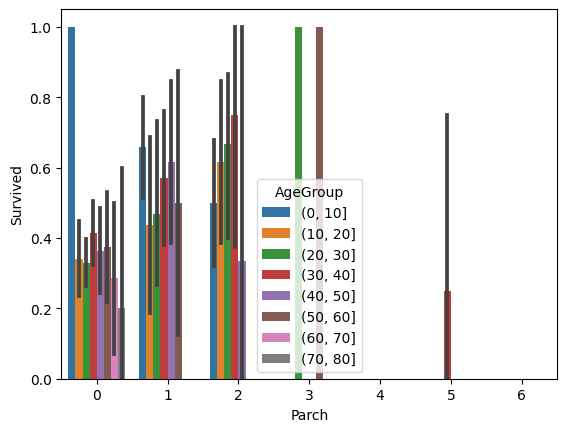

In [15]:
#parch/ageの関係性
#parch3以上だと、親しかありえないから、子供優先で生存率下がる予想
sns.barplot(x='Parch', y='Survived', hue='AgeGroup', data=train)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='FareGroup', ylabel='count'>

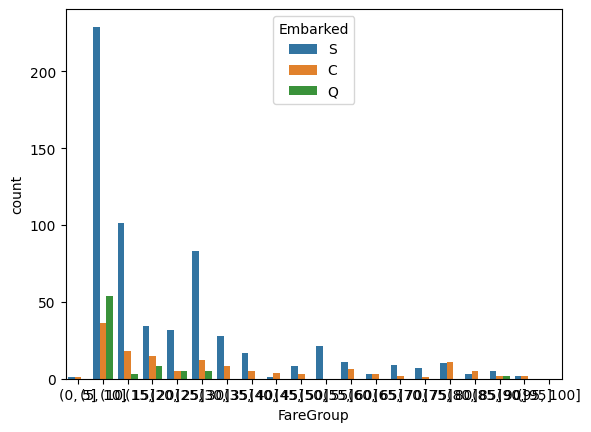

In [16]:
#fare/embarkedの関係性
train['FareGroup'] = pd.cut(train['Fare'], bins=range(0, 105, 5))
sns.countplot(x='FareGroup', hue='Embarked', data=train)


In [17]:
# Age → 中央値で補完
train['Age'] = train['Age'].fillna(train['Age'].median())

#train['Age'] → 「Age」列を指定。
#.fillna() → 欠損値（NaN）を埋めるメソッド。
#train['Age'].mean() → Age列の平均値を計算。

# Embarked の欠損を最頻値で補完
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
#.mode() → 最頻値を返す。結果はリストのような形式で返るので [0] をつけて取り出す。

# Fare の欠損を中央値で補完
train['Fare'] = train['Fare'].fillna(train['Fare'].median())

#.median() → 中央値を計算。
#Fareは外れ値（極端に大きい運賃）があるため、平均より中央値を使う方が自然なことが多い。

In [18]:
# Cabin → 欠損が多すぎるので「有無フラグ」を作成
train['Cabin_flag'] = train['Cabin'].notnull().astype(int) 

In [19]:
#カテゴリ変数のエンコーディング

from sklearn.preprocessing import LabelEncoder

# Sexを0,1に変換
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
#LabelEncoder は文字列ラベルを 整数に変換 するツール
#「どっちが0でどっちが1か」は アルファベット順 で決まります。


# EmbarkedをOne-Hot
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
#get_dummies はカテゴリ変数を 0/1のダミー変数（One-Hot） に変換する
#drop_first=True にすると 1つの列を削除して多重共線性を避ける
#例えば、Embarked に "C", "Q", "S" がある場合:
#drop_first=True → "C" を基準にして "Q" と "S" の列だけ作る
#"C" の場合は両方 0、"Q" の場合は Q=1, S=0、"S" の場合は Q=0, S=1

In [20]:
print("データ件数:", len(train)) #データの 行数（観測数）
print() #改行

print("各列の欠損数:")
print(train.isnull().sum())

データ件数: 891

各列の欠損数:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
AgeGroup       177
FareGroup       68
Cabin_flag       0
Embarked_Q       0
Embarked_S       0
dtype: int64


In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,AgeGroup,FareGroup,Cabin_flag,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,"(20, 30]","(5, 10]",0,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,"(30, 40]","(70, 75]",1,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,"(20, 30]","(5, 10]",0,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,"(30, 40]","(50, 55]",1,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,"(30, 40]","(5, 10]",0,False,True
